<a href="https://colab.research.google.com/github/poonamrjpt/LLaVa-Analysis-on-Medical-Imaging/blob/main/LLaVa_Inferencing_brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 9.7 MB/s eta 0:00:00


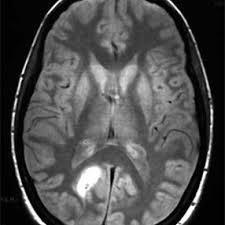

In [ ]:
import requests
from PIL import Image

image_url = "/images.jpeg"
# image = Image.open(requests.get(image_url, stream=True).raw)
image = Image.open(image_url)
image

In [ ]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [ ]:
max_new_tokens = 200
prompt = "USER: <image>\nWhat the Image is showing?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What the Image is showing?
ASSISTANT: The image is showing a close-up view of a human brain, specifically focusing on the frontal lobe. The frontal lobe is a part of the brain that is responsible for various functions, such as decision-making, problem-solving, and motor skills. The image provides a detailed look at the structure and anatomy of the frontal lobe, which can be helpful for medical professionals or researchers studying brain function and disorders.


In [ ]:
max_new_tokens = 200
prompt = "USER: <image>\nWhat kind of disease the image is showing?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What kind of disease the image is showing?
ASSISTANT: The image shows a brain tumor, which is a type of cancerous growth in the brain. The tumor is visible in the image as a dark spot surrounded by a white area, which is the brain tissue. The presence of a dark spot in the image indicates the presence of the tumor, which can cause various symptoms and complications if left untreated.


In [ ]:
max_new_tokens = 200
prompt = "USER: <image>\nFind the Tumor Region in this brsin MRI? You should show the coordinates of Tumor\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
Find the Tumor Region in this brsin MRI? You should show the coordinates of Tumor
ASSISTANT: To find the tumor region in the brain MRI, you should look for the area with the lowest contrast, which indicates the presence of the tumor. In the image, the contrast is relatively low, and the tumor appears to be located in the middle of the image. The coordinates of the tumor are approximately (0.4, 0.62, 0.62, 0.82) in the right side of the image.


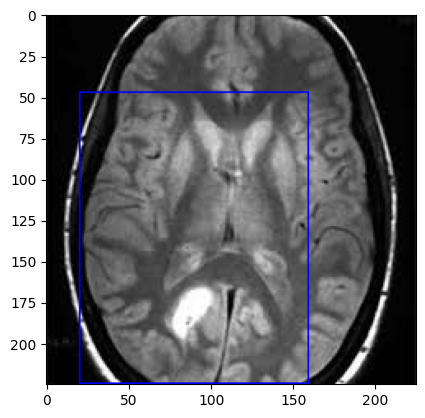

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread(image_url)
dh, dw, _ = img.shape




# Split string to float
x = 0.4
y = 0.62
w = 0.62
h = 0.82

# Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
# via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
l = int((x - w / 2) * dw)
r = int((x + w / 2) * dw)
t = int((y - h / 2) * dh)
b = int((y + h / 2) * dh)

if l < 0:
    l = 0
if r > dw - 1:
    r = dw - 1
if t < 0:
    t = 0
if b > dh - 1:
    b = dh - 1

cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)
plt.show()

In [ ]:
max_new_tokens = 200
prompt = "USER: <image>\nWhat is the name of the Tumor shown in this image?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What is the name of the Tumor shown in this image?
ASSISTANT: The name of the tumor shown in this image is a glioblastoma multiforme (GBM).
